In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
ls

 Volume in drive C has no label.
 Volume Serial Number is BC9B-4E79

 Directory of C:\Users\User\Downloads\Car Prices\archive

03/22/2021  09:14 AM    <DIR>          .
03/22/2021  09:14 AM    <DIR>          ..
10/15/2019  04:45 PM            26,717 CarPrice_Assignment.csv
10/15/2019  04:45 PM            14,884 Data Dictionary - carprices.xlsx
               2 File(s)         41,601 bytes
               2 Dir(s)  218,352,291,840 bytes free


In [76]:
cd archive

[WinError 2] The system cannot find the file specified: 'archive'
C:\Users\User\Downloads\Car Prices\archive


In [77]:
ls

 Volume in drive C has no label.
 Volume Serial Number is BC9B-4E79

 Directory of C:\Users\User\Downloads\Car Prices\archive

03/22/2021  09:14 AM    <DIR>          .
03/22/2021  09:14 AM    <DIR>          ..
10/15/2019  04:45 PM            26,717 CarPrice_Assignment.csv
10/15/2019  04:45 PM            14,884 Data Dictionary - carprices.xlsx
               2 File(s)         41,601 bytes
               2 Dir(s)  218,352,275,456 bytes free


In [78]:
dfcarprice = pd.read_csv('CarPrice_Assignment.csv')

In [79]:
dfcarprice

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [80]:
dfcarprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [81]:
dfcarprice.shape

(205, 26)

In [82]:
dfcarprice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [83]:
dfcarprice.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [84]:
dfcarprice.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [85]:
dfcarprice2 = dfcarprice.copy()

In [86]:
dfcarprice2[['CarMaker', 'CarSpec']] = dfcarprice2['CarName'].astype('string').str.split(" ",n = 1, expand = True).astype('object')

In [87]:
dfcarprice2.CarMaker.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [88]:
dfcarprice2.CarMaker.replace('toyouta', 'toyota', inplace = True)
dfcarprice2.CarMaker.replace('vokswagen', 'volkswagen', inplace = True)
dfcarprice2.CarMaker.replace('vw', 'volkswagen', inplace = True)
dfcarprice2.CarMaker.replace('porcshce', 'porsche', inplace = True)
dfcarprice2.CarMaker.replace('maxda', 'mazda', inplace = True)
dfcarprice2.CarMaker.replace('Nissan', 'nissan', inplace = True)


In [89]:
dfcarprice2.CarMaker.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [90]:
dfcarprice2.drop(['CarName','CarSpec'], axis = 1, inplace = True)

In [91]:
dfcarprice2.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'CarMaker'],
      dtype='object')

In [92]:
dfcarprice2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
labelencoder = LabelEncoder()

In [95]:
for i in dfcarprice2.select_dtypes('object').columns:
    dfcarprice2[i] = labelencoder.fit_transform(dfcarprice2[i])

In [96]:
"""
dfcarprice2.CarName = labelencoder.fit_transform(dfcarprice2.CarName)
dfcarprice2.fueltype  = labelencoder.fit_transform(dfcarprice2.fueltype)
dfcarprice2.aspiration  = labelencoder.fit_transform(dfcarprice2.aspiration)
dfcarprice2.doornumber  = labelencoder.fit_transform(dfcarprice2.doornumber)
dfcarprice2.carbody = labelencoder.fit_transform(dfcarprice2.carbody)
dfcarprice2.drivewheel = labelencoder.fit_transform(dfcarprice2.drivewheel)
dfcarprice2.enginelocation = labelencoder.fit_transform(dfcarprice2.enginelocation)
dfcarprice2.enginetype  = labelencoder.fit_transform(dfcarprice2.enginetype)
dfcarprice2.cylindernumber = labelencoder.fit_transform(dfcarprice2.cylindernumber)
dfcarprice2.fuelsystem = labelencoder.fit_transform(dfcarprice2.fuelsystem)
"""

'\ndfcarprice2.CarName = labelencoder.fit_transform(dfcarprice2.CarName)\ndfcarprice2.fueltype  = labelencoder.fit_transform(dfcarprice2.fueltype)\ndfcarprice2.aspiration  = labelencoder.fit_transform(dfcarprice2.aspiration)\ndfcarprice2.doornumber  = labelencoder.fit_transform(dfcarprice2.doornumber)\ndfcarprice2.carbody = labelencoder.fit_transform(dfcarprice2.carbody)\ndfcarprice2.drivewheel = labelencoder.fit_transform(dfcarprice2.drivewheel)\ndfcarprice2.enginelocation = labelencoder.fit_transform(dfcarprice2.enginelocation)\ndfcarprice2.enginetype  = labelencoder.fit_transform(dfcarprice2.enginetype)\ndfcarprice2.cylindernumber = labelencoder.fit_transform(dfcarprice2.cylindernumber)\ndfcarprice2.fuelsystem = labelencoder.fit_transform(dfcarprice2.fuelsystem)\n'

In [97]:
dfcarprice2.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarMaker
0,1,3,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,1,0,1,2,2,0,94.5,171.2,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,2,1,0,0,3,1,0,99.8,176.6,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,1,0,0,3,0,0,99.4,176.6,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [98]:
import seaborn as sns

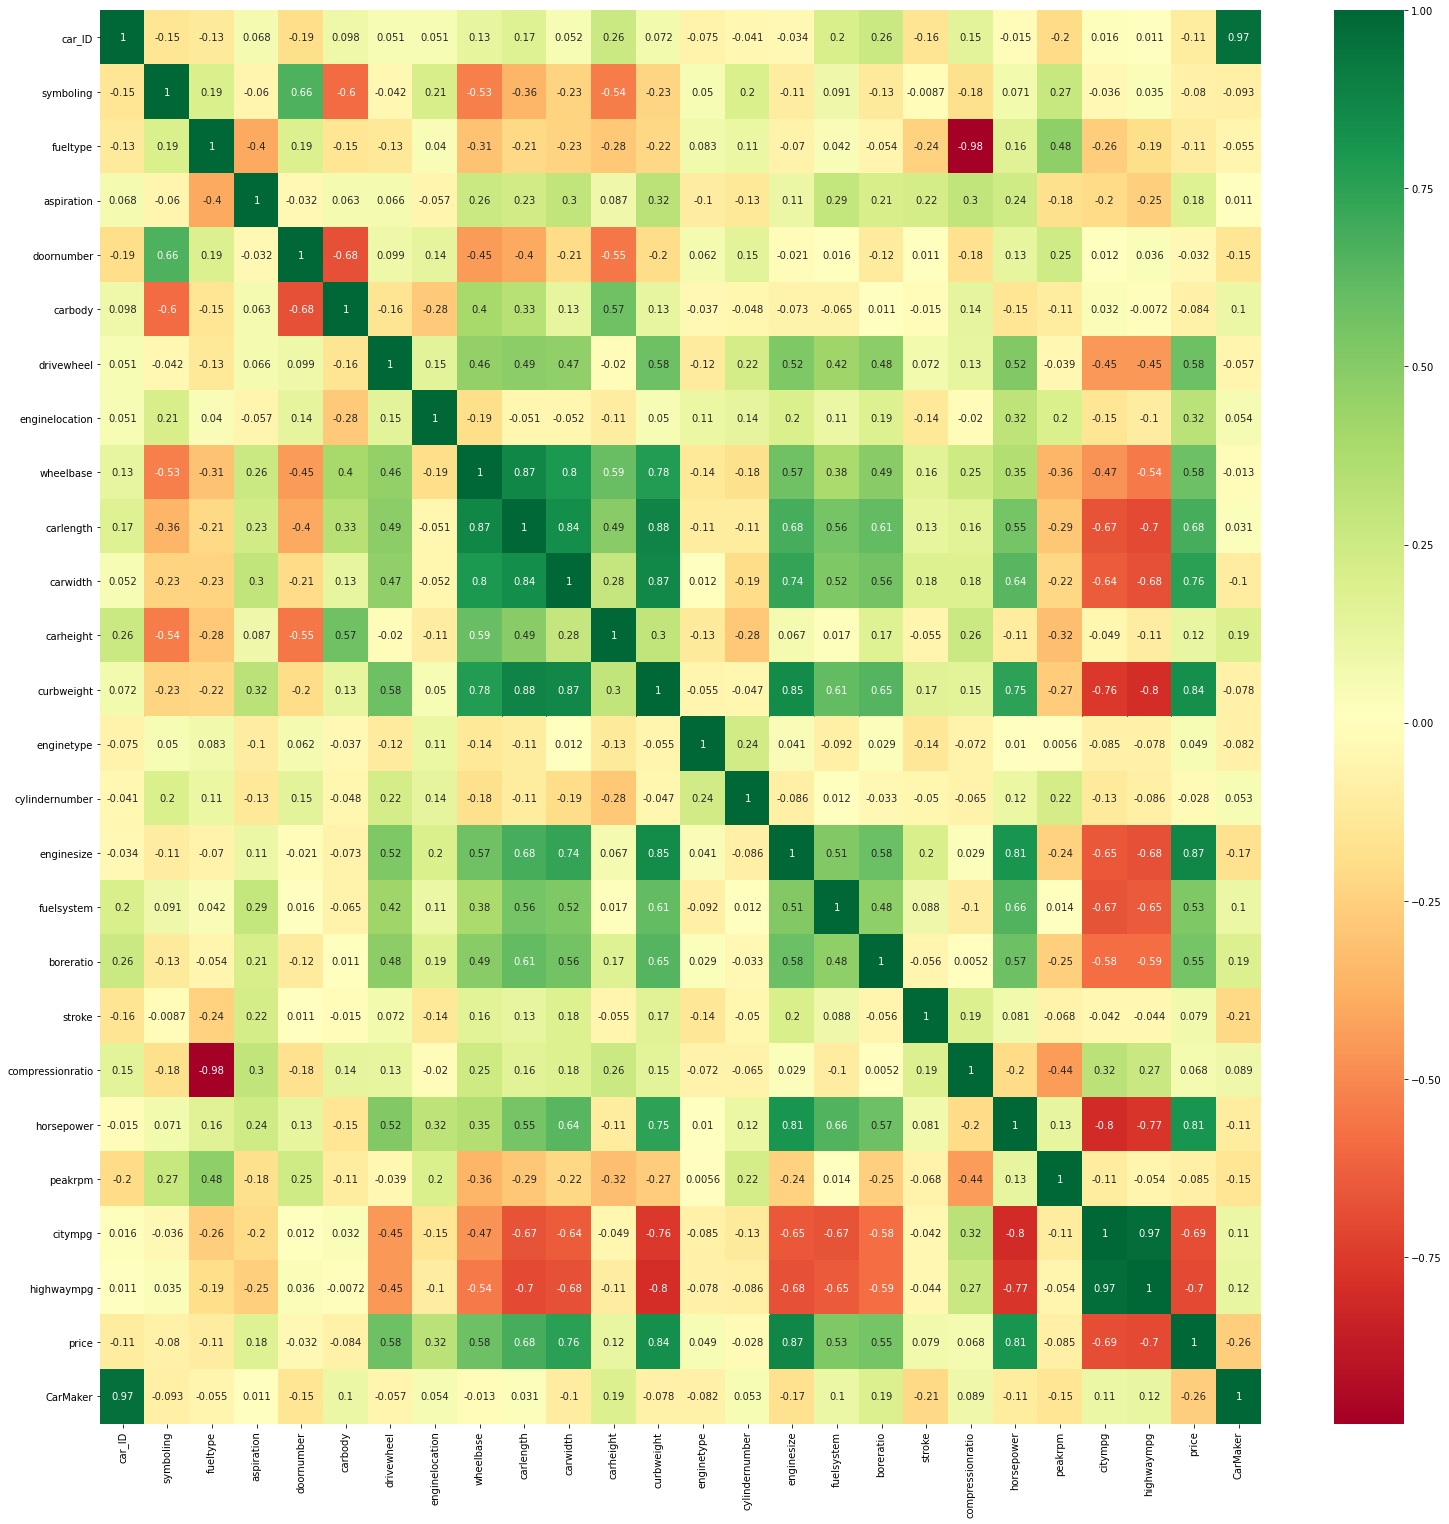

In [99]:
corrmat = dfcarprice2.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (26, 26))
g = sns.heatmap(dfcarprice2[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [100]:
corrmat

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarMaker
car_ID,1.000000,-0.151621,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,0.170636,...,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.968701
symboling,-0.151621,1.000000,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.092793
fueltype,-0.125568,0.194311,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,...,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679,-0.055049
aspiration,0.067729,-0.059866,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926,0.011326
doornumber,-0.190352,0.664073,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,...,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835,-0.150465
carbody,0.098303,-0.596135,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976,0.101473
drivewheel,0.051406,-0.041671,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992,-0.056639
enginelocation,0.051483,0.212471,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973,0.054410
wheelbase,0.129729,-0.531954,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.013288
carlength,0.170636,-0.357612,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,0.030733


In [101]:
dfcarprice2.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarMaker
0,1,3,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,1,0,1,2,2,0,94.5,171.2,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,2,1,0,0,3,1,0,99.8,176.6,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,1,0,0,3,0,0,99.4,176.6,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [102]:
#sns.pairplot(dfcarprice2[['symboling', 'fueltype', 'aspiration', 'doornumber',
#       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
#       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
#       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
#       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'CarMaker']])

In [103]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [123]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu', input_shape=(25,)))
    #model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    #model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', metrics=['mae'], optimizer='adam') #rmsprop
    return model

In [124]:
from sklearn import preprocessing

In [125]:
carprices = dfcarprice2.price.values

In [126]:
#carfeatures = dfcarprice2.drop(['price'], axis = 1).values 

#carfeatures = preprocessing.normalize(dfcarprice2.drop(['price'], axis = 1).values, axis = 0)

#min_max_scaler = preprocessing.MinMaxScaler()
#carfeatures = min_max_scaler.fit_transform(dfcarprice2.drop(['price'], axis = 1).values)

standard_scaler = preprocessing.StandardScaler()
carfeatures = standard_scaler.fit_transform(dfcarprice2.drop(['price'], axis = 1).values)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
carfeatures_trainval, carfeatures_test, carprices_trainval, carprices_test = train_test_split(carfeatures, carprices, test_size=0.3, random_state=42)

In [129]:
print(carfeatures_trainval.shape);
print(carfeatures_test.shape);
print(carprices_trainval.shape);
print(carprices_test.shape)

(143, 25)
(62, 25)
(143,)
(62,)


In [130]:
print(carfeatures_trainval)
print(carprices_trainval)

[[ 1.26736933 -1.47645244  0.32879797 ...  0.27282295  0.18178288
   1.08428363]
 [-0.45625296  0.133509    0.32879797 ... -0.95301169 -0.98276371
  -0.35079764]
 [ 1.21667456 -1.47645244 -3.04138127 ...  0.73251094  0.32735121
   1.08428363]
 ...
 [-0.16898258  0.133509    0.32879797 ...  0.88574028  0.9096245
  -0.03189069]
 [ 1.30116584  1.74347043  0.32879797 ... -0.95301169 -0.98276371
   1.08428363]
 [ 0.         -0.67147172  0.32879797 ... -1.25947035 -1.27390036
  -0.03189069]]
[11248.  16503.  10698.   6855.  20970.   7295.  22018.  10345.   6938.
 18150.   7603.   6095.  16695.   9538.  12945.  12764.   6669.   7957.
  7609.  18620.  16845.  18150.  16500.   6189.  11048.   7609.  34028.
  6989.   5118.   7295.  17075.  10595.   6377.  15510.  13845.   6529.
 16925.  18950.   8058.  17710.   8558.  32528.  15985.   7126.  17450.
  5399.  12440.   9495.  16630.   8013.  16430.  10245.   5572.   5348.
 11199.  13495.   7995.   7975.  31600.  22470.  11245.   8916.5  9298.
  892

In [131]:
carfeatures_trainval.max(axis = 0)

array([1.72362229, 1.74347043, 0.32879797, 2.13085442, 1.13038833,
       1.61656151, 1.21333041, 8.20568908, 2.80393159, 2.31984714,
       2.98705557, 2.49230162, 2.90798777, 2.83728893, 4.89126596,
       4.79267891, 1.86544089, 2.25863757, 2.92357458, 3.24491627,
       4.6614478 , 3.09964995, 1.95834559, 2.36530774, 1.40319058])

In [132]:
from sklearn.model_selection import RepeatedKFold

In [133]:
#kf = KFold(n_splits=3)
rkf = RepeatedKFold(n_splits=3, n_repeats=3)

In [134]:
all_scores = []

In [135]:
for train_index, test_index in rkf.split(carfeatures_trainval):
    #print("TRAIN:", train_index, "TEST:", test_index)
    carfeatures_trainval_train , carfeatures_trainval_test = carfeatures_trainval[train_index],carfeatures_trainval[test_index]
    carprices_trainval_train , carprices_trainval_test = carprices_trainval[train_index] , carprices_trainval[test_index]
    model = build_model()
    history = model.fit(carfeatures_trainval_train, carprices_trainval_train, epochs=500, batch_size=1)
    history_dict = history.history
    val_mse, val_mae = model.evaluate(carfeatures_trainval_test, carprices_trainval_test)
    all_scores.append(val_mae)

Epoch 1/500
95/95 [==============================] - 0s 471us/step - loss: 231855424.0000 - mae: 13089.2754
Epoch 2/500
95/95 [==============================] - 0s 476us/step - loss: 231737856.0000 - mae: 13085.1426
Epoch 3/500
95/95 [==============================] - 0s 448us/step - loss: 231394528.0000 - mae: 13073.6484
Epoch 4/500
95/95 [==============================] - 0s 398us/step - loss: 230490976.0000 - mae: 13045.8408
Epoch 5/500
95/95 [==============================] - 0s 443us/step - loss: 228633328.0000 - mae: 12988.2354
Epoch 6/500
95/95 [==============================] - 0s 530us/step - loss: 225533328.0000 - mae: 12895.1260
Epoch 7/500
95/95 [==============================] - 0s 490us/step - loss: 221053616.0000 - mae: 12757.5449
Epoch 8/500
95/95 [==============================] - 0s 419us/step - loss: 214922400.0000 - mae: 12572.1055
Epoch 9/500
95/95 [==============================] - 0s 417us/step - loss: 206950288.0000 - mae: 12341.9180
Epoch 10/500
95/95 [========

95/95 [==============================] - 0s 503us/step - loss: 6922404.5000 - mae: 1910.0304
Epoch 77/500
95/95 [==============================] - 0s 400us/step - loss: 6805733.0000 - mae: 1897.2373
Epoch 78/500
95/95 [==============================] - 0s 430us/step - loss: 6687848.5000 - mae: 1878.1879
Epoch 79/500
95/95 [==============================] - 0s 448us/step - loss: 6624642.5000 - mae: 1876.5029
Epoch 80/500
95/95 [==============================] - 0s 381us/step - loss: 6542420.0000 - mae: 1863.1444
Epoch 81/500
95/95 [==============================] - 0s 424us/step - loss: 6409224.0000 - mae: 1846.9819
Epoch 82/500
95/95 [==============================] - 0s 408us/step - loss: 6377472.0000 - mae: 1848.3906
Epoch 83/500
95/95 [==============================] - 0s 409us/step - loss: 6256981.0000 - mae: 1829.4375
Epoch 84/500
95/95 [==============================] - 0s 421us/step - loss: 6178525.5000 - mae: 1822.0522
Epoch 85/500
95/95 [==============================] - 0s 44

95/95 [==============================] - 0s 386us/step - loss: 3283209.5000 - mae: 1342.9958
Epoch 153/500
95/95 [==============================] - 0s 388us/step - loss: 3275343.7500 - mae: 1336.6272
Epoch 154/500
95/95 [==============================] - 0s 441us/step - loss: 3237355.0000 - mae: 1330.0316
Epoch 155/500
95/95 [==============================] - 0s 405us/step - loss: 3226498.0000 - mae: 1330.3564
Epoch 156/500
95/95 [==============================] - 0s 414us/step - loss: 3187576.5000 - mae: 1319.3386
Epoch 157/500
95/95 [==============================] - 0s 395us/step - loss: 3175520.0000 - mae: 1315.5223
Epoch 158/500
95/95 [==============================] - 0s 514us/step - loss: 3141525.2500 - mae: 1309.6798
Epoch 159/500
95/95 [==============================] - 0s 463us/step - loss: 3129649.2500 - mae: 1310.3419
Epoch 160/500
95/95 [==============================] - 0s 394us/step - loss: 3107370.7500 - mae: 1301.9310
Epoch 161/500
95/95 [==============================

95/95 [==============================] - 0s 397us/step - loss: 2250796.7500 - mae: 1114.0278
Epoch 229/500
95/95 [==============================] - 0s 450us/step - loss: 2246301.2500 - mae: 1109.5084
Epoch 230/500
95/95 [==============================] - 0s 489us/step - loss: 2226988.7500 - mae: 1103.8544
Epoch 231/500
95/95 [==============================] - 0s 426us/step - loss: 2243418.0000 - mae: 1103.6895
Epoch 232/500
95/95 [==============================] - 0s 459us/step - loss: 2222527.7500 - mae: 1103.9321
Epoch 233/500
95/95 [==============================] - 0s 444us/step - loss: 2222208.7500 - mae: 1099.8832
Epoch 234/500
95/95 [==============================] - 0s 414us/step - loss: 2226845.2500 - mae: 1110.7875
Epoch 235/500
95/95 [==============================] - 0s 435us/step - loss: 2208190.2500 - mae: 1100.3438
Epoch 236/500
95/95 [==============================] - 0s 447us/step - loss: 2175846.7500 - mae: 1089.7920
Epoch 237/500
95/95 [==============================

95/95 [==============================] - 0s 439us/step - loss: 1692156.1250 - mae: 973.4188
Epoch 305/500
95/95 [==============================] - 0s 419us/step - loss: 1692194.8750 - mae: 967.7668
Epoch 306/500
95/95 [==============================] - 0s 468us/step - loss: 1669663.1250 - mae: 966.0963
Epoch 307/500
95/95 [==============================] - 0s 410us/step - loss: 1688704.0000 - mae: 969.1514
Epoch 308/500
95/95 [==============================] - 0s 419us/step - loss: 1678799.6250 - mae: 956.3555
Epoch 309/500
95/95 [==============================] - 0s 418us/step - loss: 1660046.3750 - mae: 961.6783
Epoch 310/500
95/95 [==============================] - 0s 416us/step - loss: 1665593.8750 - mae: 950.2396
Epoch 311/500
95/95 [==============================] - 0s 393us/step - loss: 1641873.3750 - mae: 958.9212
Epoch 312/500
95/95 [==============================] - 0s 399us/step - loss: 1649353.1250 - mae: 957.6717
Epoch 313/500
95/95 [==============================] - 0s 39

95/95 [==============================] - 0s 421us/step - loss: 1279702.5000 - mae: 834.9072
Epoch 382/500
95/95 [==============================] - 0s 408us/step - loss: 1272827.6250 - mae: 835.4974
Epoch 383/500
95/95 [==============================] - 0s 420us/step - loss: 1275806.1250 - mae: 828.4214
Epoch 384/500
95/95 [==============================] - 0s 406us/step - loss: 1283802.8750 - mae: 835.5320
Epoch 385/500
95/95 [==============================] - 0s 403us/step - loss: 1263819.2500 - mae: 825.5759
Epoch 386/500
95/95 [==============================] - 0s 390us/step - loss: 1254787.5000 - mae: 825.4493
Epoch 387/500
95/95 [==============================] - 0s 410us/step - loss: 1265725.1250 - mae: 829.1106
Epoch 388/500
95/95 [==============================] - 0s 429us/step - loss: 1254850.0000 - mae: 830.8004
Epoch 389/500
95/95 [==============================] - 0s 433us/step - loss: 1259482.2500 - mae: 822.5782
Epoch 390/500
95/95 [==============================] - 0s 41

95/95 [==============================] - 0s 425us/step - loss: 983357.5000 - mae: 722.4760
Epoch 459/500
95/95 [==============================] - 0s 413us/step - loss: 973025.3750 - mae: 726.0093
Epoch 460/500
95/95 [==============================] - 0s 419us/step - loss: 993482.4375 - mae: 714.5048
Epoch 461/500
95/95 [==============================] - 0s 412us/step - loss: 971267.1875 - mae: 721.8751
Epoch 462/500
95/95 [==============================] - 0s 454us/step - loss: 987307.9375 - mae: 733.2238
Epoch 463/500
95/95 [==============================] - 0s 419us/step - loss: 981970.6875 - mae: 718.1624
Epoch 464/500
95/95 [==============================] - 0s 470us/step - loss: 959443.0625 - mae: 720.1527
Epoch 465/500
95/95 [==============================] - 0s 493us/step - loss: 962606.8125 - mae: 707.0372
Epoch 466/500
95/95 [==============================] - ETA: 0s - loss: 127345.8281 - mae: 356.85 - 0s 436us/step - loss: 954285.5000 - mae: 717.1996
Epoch 467/500
95/95 [====

95/95 [==============================] - 0s 455us/step - loss: 30677014.0000 - mae: 4819.3311
Epoch 27/500
95/95 [==============================] - 0s 408us/step - loss: 29164450.0000 - mae: 4695.8027
Epoch 28/500
95/95 [==============================] - 0s 454us/step - loss: 27866518.0000 - mae: 4569.8672
Epoch 29/500
95/95 [==============================] - 0s 415us/step - loss: 26624560.0000 - mae: 4441.3447
Epoch 30/500
95/95 [==============================] - 0s 389us/step - loss: 25402734.0000 - mae: 4315.9463
Epoch 31/500
95/95 [==============================] - 0s 392us/step - loss: 24351308.0000 - mae: 4209.7070
Epoch 32/500
95/95 [==============================] - 0s 376us/step - loss: 23239290.0000 - mae: 4080.2585
Epoch 33/500
95/95 [==============================] - 0s 399us/step - loss: 22295102.0000 - mae: 3967.4482
Epoch 34/500
95/95 [==============================] - 0s 416us/step - loss: 21321710.0000 - mae: 3853.2161
Epoch 35/500
95/95 [==============================

95/95 [==============================] - 0s 493us/step - loss: 4756693.5000 - mae: 1677.0778
Epoch 103/500
95/95 [==============================] - 0s 412us/step - loss: 4759492.5000 - mae: 1675.9370
Epoch 104/500
95/95 [==============================] - 0s 468us/step - loss: 4681259.5000 - mae: 1652.8518
Epoch 105/500
95/95 [==============================] - 0s 431us/step - loss: 4672332.0000 - mae: 1649.4774
Epoch 106/500
95/95 [==============================] - 0s 451us/step - loss: 4615293.0000 - mae: 1647.5009
Epoch 107/500
95/95 [==============================] - 0s 469us/step - loss: 4594304.0000 - mae: 1644.4462
Epoch 108/500
95/95 [==============================] - 0s 492us/step - loss: 4572621.0000 - mae: 1628.9021
Epoch 109/500
95/95 [==============================] - 0s 414us/step - loss: 4497688.5000 - mae: 1615.2534
Epoch 110/500
95/95 [==============================] - 0s 452us/step - loss: 4495854.5000 - mae: 1624.4857
Epoch 111/500
95/95 [==============================

95/95 [==============================] - 0s 544us/step - loss: 2980625.7500 - mae: 1303.1904
Epoch 178/500
95/95 [==============================] - 0s 516us/step - loss: 2926295.5000 - mae: 1288.8154
Epoch 179/500
95/95 [==============================] - 0s 455us/step - loss: 2945779.7500 - mae: 1300.1456
Epoch 180/500
95/95 [==============================] - 0s 492us/step - loss: 2946908.7500 - mae: 1283.2399
Epoch 181/500
95/95 [==============================] - 0s 492us/step - loss: 2897255.0000 - mae: 1286.1904
Epoch 182/500
95/95 [==============================] - 0s 492us/step - loss: 2908396.2500 - mae: 1279.7003
Epoch 183/500
95/95 [==============================] - ETA: 0s - loss: 38999.6914 - mae: 197.483 - 0s 444us/step - loss: 2876100.0000 - mae: 1274.4159
Epoch 184/500
95/95 [==============================] - ETA: 0s - loss: 1552447.8750 - mae: 1245.97 - 0s 453us/step - loss: 2850392.2500 - mae: 1269.3849
Epoch 185/500
95/95 [==============================] - 0s 487us/step

95/95 [==============================] - 0s 735us/step - loss: 2237819.7500 - mae: 1110.2522
Epoch 251/500
95/95 [==============================] - 0s 672us/step - loss: 2203227.5000 - mae: 1108.6239
Epoch 252/500
95/95 [==============================] - 0s 609us/step - loss: 2209549.2500 - mae: 1108.7699
Epoch 253/500
95/95 [==============================] - 0s 598us/step - loss: 2195417.2500 - mae: 1099.2559
Epoch 254/500
95/95 [==============================] - 0s 640us/step - loss: 2211917.2500 - mae: 1102.5957
Epoch 255/500
95/95 [==============================] - 0s 640us/step - loss: 2206109.7500 - mae: 1105.0406
Epoch 256/500
95/95 [==============================] - 0s 598us/step - loss: 2179105.2500 - mae: 1109.0868
Epoch 257/500
95/95 [==============================] - 0s 600us/step - loss: 2184716.0000 - mae: 1092.7808
Epoch 258/500
95/95 [==============================] - 0s 556us/step - loss: 2208532.7500 - mae: 1114.5499
Epoch 259/500
95/95 [==============================

95/95 [==============================] - 0s 1ms/step - loss: 1730624.0000 - mae: 995.1614
Epoch 328/500
95/95 [==============================] - 0s 1ms/step - loss: 1720584.6250 - mae: 986.9872
Epoch 329/500
95/95 [==============================] - 0s 1ms/step - loss: 1731876.7500 - mae: 990.7799
Epoch 330/500
95/95 [==============================] - 0s 1ms/step - loss: 1700769.3750 - mae: 982.3573
Epoch 331/500
95/95 [==============================] - 0s 1ms/step - loss: 1698208.0000 - mae: 976.6110
Epoch 332/500
95/95 [==============================] - 0s 1ms/step - loss: 1685712.3750 - mae: 982.7583
Epoch 333/500
95/95 [==============================] - 0s 1ms/step - loss: 1677744.3750 - mae: 978.6464
Epoch 334/500
95/95 [==============================] - 0s 1ms/step - loss: 1677100.2500 - mae: 976.6705
Epoch 335/500
95/95 [==============================] - 0s 1ms/step - loss: 1657869.2500 - mae: 969.1996
Epoch 336/500
95/95 [==============================] - 0s 1ms/step - loss: 166

95/95 [==============================] - 0s 437us/step - loss: 1291308.5000 - mae: 854.3867
Epoch 405/500
95/95 [==============================] - 0s 447us/step - loss: 1306388.8750 - mae: 865.0900
Epoch 406/500
95/95 [==============================] - 0s 430us/step - loss: 1281220.7500 - mae: 853.7346
Epoch 407/500
95/95 [==============================] - 0s 396us/step - loss: 1288832.6250 - mae: 865.9745
Epoch 408/500
95/95 [==============================] - 0s 408us/step - loss: 1298775.1250 - mae: 855.5376
Epoch 409/500
95/95 [==============================] - 0s 427us/step - loss: 1322075.8750 - mae: 872.0177
Epoch 410/500
95/95 [==============================] - 0s 386us/step - loss: 1275126.8750 - mae: 862.1044
Epoch 411/500
95/95 [==============================] - 0s 399us/step - loss: 1279571.7500 - mae: 869.0604
Epoch 412/500
95/95 [==============================] - 0s 410us/step - loss: 1256349.2500 - mae: 846.6232
Epoch 413/500
95/95 [==============================] - 0s 47

95/95 [==============================] - 0s 2ms/step - loss: 975819.9375 - mae: 751.7126
Epoch 482/500
95/95 [==============================] - 0s 480us/step - loss: 988951.3125 - mae: 750.1703
Epoch 483/500
95/95 [==============================] - 0s 465us/step - loss: 982547.9375 - mae: 761.6883
Epoch 484/500
95/95 [==============================] - 0s 487us/step - loss: 989577.2500 - mae: 744.8367
Epoch 485/500
95/95 [==============================] - 0s 457us/step - loss: 983055.0000 - mae: 753.6874
Epoch 486/500
95/95 [==============================] - 0s 439us/step - loss: 968495.1875 - mae: 742.6423
Epoch 487/500
95/95 [==============================] - 0s 485us/step - loss: 959173.5000 - mae: 753.0951
Epoch 488/500
95/95 [==============================] - 0s 494us/step - loss: 965917.0625 - mae: 744.1146
Epoch 489/500
95/95 [==============================] - 0s 497us/step - loss: 947520.6875 - mae: 748.9714
Epoch 490/500
95/95 [==============================] - 0s 504us/step - 

96/96 [==============================] - 0s 491us/step - loss: 8555273.0000 - mae: 2264.7483
Epoch 48/500
96/96 [==============================] - 0s 539us/step - loss: 8275930.5000 - mae: 2234.7834
Epoch 49/500
96/96 [==============================] - 0s 571us/step - loss: 8051825.5000 - mae: 2196.7859
Epoch 50/500
96/96 [==============================] - 0s 665us/step - loss: 7822731.5000 - mae: 2163.0659
Epoch 51/500
96/96 [==============================] - 0s 571us/step - loss: 7641699.5000 - mae: 2138.6150
Epoch 52/500
96/96 [==============================] - 0s 561us/step - loss: 7405913.5000 - mae: 2092.3630
Epoch 53/500
96/96 [==============================] - 0s 623us/step - loss: 7214194.5000 - mae: 2077.2947
Epoch 54/500
96/96 [==============================] - 0s 509us/step - loss: 7056572.0000 - mae: 2047.0355
Epoch 55/500
96/96 [==============================] - 0s 582us/step - loss: 6898174.0000 - mae: 2018.3807
Epoch 56/500
96/96 [==============================] - 0s 60

96/96 [==============================] - 0s 1ms/step - loss: 3256668.7500 - mae: 1321.8737
Epoch 124/500
96/96 [==============================] - 0s 1ms/step - loss: 3211421.2500 - mae: 1297.0165
Epoch 125/500
96/96 [==============================] - 0s 1ms/step - loss: 3212701.0000 - mae: 1317.0577
Epoch 126/500
96/96 [==============================] - 0s 1ms/step - loss: 3170489.2500 - mae: 1298.4044
Epoch 127/500
96/96 [==============================] - 0s 1ms/step - loss: 3168227.0000 - mae: 1292.3719
Epoch 128/500
96/96 [==============================] - 0s 1ms/step - loss: 3146136.2500 - mae: 1299.8842
Epoch 129/500
96/96 [==============================] - 0s 1ms/step - loss: 3160372.0000 - mae: 1296.2954
Epoch 130/500
96/96 [==============================] - 0s 1ms/step - loss: 3112549.7500 - mae: 1284.8199
Epoch 131/500
96/96 [==============================] - 0s 1ms/step - loss: 3087067.0000 - mae: 1279.3994
Epoch 132/500
96/96 [==============================] - 0s 1ms/step - 

96/96 [==============================] - 0s 406us/step - loss: 2174146.2500 - mae: 1065.2158
Epoch 200/500
96/96 [==============================] - 0s 429us/step - loss: 2188615.2500 - mae: 1060.7374
Epoch 201/500
96/96 [==============================] - 0s 433us/step - loss: 2202793.2500 - mae: 1075.9354
Epoch 202/500
96/96 [==============================] - 0s 392us/step - loss: 2180320.7500 - mae: 1055.5261
Epoch 203/500
96/96 [==============================] - 0s 394us/step - loss: 2135438.0000 - mae: 1048.4906
Epoch 204/500
96/96 [==============================] - 0s 449us/step - loss: 2129937.0000 - mae: 1040.3793
Epoch 205/500
96/96 [==============================] - 0s 446us/step - loss: 2144262.2500 - mae: 1054.7921
Epoch 206/500
96/96 [==============================] - 0s 380us/step - loss: 2109673.7500 - mae: 1039.8917
Epoch 207/500
96/96 [==============================] - 0s 427us/step - loss: 2095469.8750 - mae: 1032.7812
Epoch 208/500
96/96 [==============================

96/96 [==============================] - 0s 506us/step - loss: 1580364.0000 - mae: 904.9502
Epoch 277/500
96/96 [==============================] - 0s 456us/step - loss: 1569037.6250 - mae: 906.9731
Epoch 278/500
96/96 [==============================] - 0s 496us/step - loss: 1571869.6250 - mae: 909.9772
Epoch 279/500
96/96 [==============================] - 0s 633us/step - loss: 1563168.0000 - mae: 913.6824
Epoch 280/500
96/96 [==============================] - 0s 541us/step - loss: 1543297.5000 - mae: 900.4605
Epoch 281/500
96/96 [==============================] - 0s 545us/step - loss: 1566703.1250 - mae: 899.6846
Epoch 282/500
96/96 [==============================] - 0s 512us/step - loss: 1579522.8750 - mae: 911.3069
Epoch 283/500
96/96 [==============================] - 0s 532us/step - loss: 1540105.1250 - mae: 900.7780
Epoch 284/500
96/96 [==============================] - 0s 556us/step - loss: 1537039.0000 - mae: 898.5790
Epoch 285/500
96/96 [==============================] - 0s 59

96/96 [==============================] - 0s 823us/step - loss: 1198216.0000 - mae: 805.4362
Epoch 354/500
96/96 [==============================] - 0s 533us/step - loss: 1191502.0000 - mae: 795.3005
Epoch 355/500
96/96 [==============================] - 0s 727us/step - loss: 1232153.5000 - mae: 805.4670
Epoch 356/500
96/96 [==============================] - 0s 544us/step - loss: 1202211.6250 - mae: 800.3795
Epoch 357/500
96/96 [==============================] - 0s 499us/step - loss: 1200126.3750 - mae: 802.0067
Epoch 358/500
96/96 [==============================] - 0s 579us/step - loss: 1175503.6250 - mae: 793.3825
Epoch 359/500
96/96 [==============================] - 0s 563us/step - loss: 1192853.0000 - mae: 797.8528
Epoch 360/500
96/96 [==============================] - 0s 492us/step - loss: 1178090.6250 - mae: 799.9727
Epoch 361/500
96/96 [==============================] - 0s 478us/step - loss: 1186772.1250 - mae: 799.6833
Epoch 362/500
96/96 [==============================] - 0s 50

96/96 [==============================] - 0s 374us/step - loss: 965581.0625 - mae: 714.4704
Epoch 432/500
96/96 [==============================] - 0s 390us/step - loss: 974092.1875 - mae: 725.6496
Epoch 433/500
96/96 [==============================] - 0s 353us/step - loss: 960920.0000 - mae: 716.7482
Epoch 434/500
96/96 [==============================] - 0s 395us/step - loss: 984626.0000 - mae: 718.1883
Epoch 435/500
96/96 [==============================] - 0s 426us/step - loss: 983557.6875 - mae: 726.8105
Epoch 436/500
96/96 [==============================] - 0s 378us/step - loss: 946226.4375 - mae: 705.0732
Epoch 437/500
96/96 [==============================] - 0s 392us/step - loss: 954727.3125 - mae: 716.1990
Epoch 438/500
96/96 [==============================] - 0s 353us/step - loss: 938497.4375 - mae: 708.3787
Epoch 439/500
96/96 [==============================] - 0s 353us/step - loss: 950940.4375 - mae: 714.0203
Epoch 440/500
96/96 [==============================] - 0s 439us/step 

2/2 [==============================] - 0s 997us/step - loss: 5178937.0000 - mae: 1704.0355
Epoch 1/500
95/95 [==============================] - 0s 452us/step - loss: 226336384.0000 - mae: 12870.9648
Epoch 2/500
95/95 [==============================] - 0s 393us/step - loss: 226108832.0000 - mae: 12863.9814
Epoch 3/500
95/95 [==============================] - 0s 368us/step - loss: 225454336.0000 - mae: 12843.3457
Epoch 4/500
95/95 [==============================] - 0s 385us/step - loss: 224001984.0000 - mae: 12799.5391
Epoch 5/500
95/95 [==============================] - 0s 427us/step - loss: 221271264.0000 - mae: 12720.4307
Epoch 6/500
95/95 [==============================] - 0s 391us/step - loss: 216881936.0000 - mae: 12591.5381
Epoch 7/500
95/95 [==============================] - 0s 383us/step - loss: 210687632.0000 - mae: 12408.1621
Epoch 8/500
95/95 [==============================] - 0s 367us/step - loss: 202540752.0000 - mae: 12166.8906
Epoch 9/500
95/95 [==========================

95/95 [==============================] - 0s 408us/step - loss: 6219936.5000 - mae: 1958.0138
Epoch 75/500
95/95 [==============================] - 0s 391us/step - loss: 6143327.0000 - mae: 1944.0530
Epoch 76/500
95/95 [==============================] - 0s 403us/step - loss: 5993046.0000 - mae: 1914.1473
Epoch 77/500
95/95 [==============================] - 0s 433us/step - loss: 5868758.0000 - mae: 1893.6163
Epoch 78/500
95/95 [==============================] - 0s 448us/step - loss: 5761077.0000 - mae: 1877.2963
Epoch 79/500
95/95 [==============================] - 0s 399us/step - loss: 5678847.5000 - mae: 1857.5939
Epoch 80/500
95/95 [==============================] - 0s 399us/step - loss: 5595813.0000 - mae: 1854.7108
Epoch 81/500
95/95 [==============================] - 0s 388us/step - loss: 5500762.5000 - mae: 1821.7363
Epoch 82/500
95/95 [==============================] - 0s 400us/step - loss: 5359901.5000 - mae: 1796.7633
Epoch 83/500
95/95 [==============================] - 0s 38

Epoch 150/500
95/95 [==============================] - 0s 478us/step - loss: 2791881.7500 - mae: 1241.5804
Epoch 151/500
95/95 [==============================] - 0s 481us/step - loss: 2770256.7500 - mae: 1242.8468
Epoch 152/500
95/95 [==============================] - 0s 479us/step - loss: 2753086.5000 - mae: 1230.5269
Epoch 153/500
95/95 [==============================] - 0s 460us/step - loss: 2759034.0000 - mae: 1250.1897
Epoch 154/500
95/95 [==============================] - 0s 399us/step - loss: 2721241.5000 - mae: 1216.9396
Epoch 155/500
95/95 [==============================] - 0s 436us/step - loss: 2723406.5000 - mae: 1227.4250
Epoch 156/500
95/95 [==============================] - 0s 520us/step - loss: 2683812.2500 - mae: 1222.2340
Epoch 157/500
95/95 [==============================] - 0s 555us/step - loss: 2658784.2500 - mae: 1221.5491
Epoch 158/500
95/95 [==============================] - 0s 640us/step - loss: 2656681.0000 - mae: 1208.9082
Epoch 159/500
95/95 [================

95/95 [==============================] - 0s 395us/step - loss: 1871951.8750 - mae: 1032.3060
Epoch 228/500
95/95 [==============================] - 0s 426us/step - loss: 1861448.7500 - mae: 1033.0383
Epoch 229/500
95/95 [==============================] - 0s 366us/step - loss: 1893115.1250 - mae: 1051.4360
Epoch 230/500
95/95 [==============================] - 0s 430us/step - loss: 1841325.1250 - mae: 1024.9250
Epoch 231/500
95/95 [==============================] - 0s 415us/step - loss: 1844800.5000 - mae: 1024.3884
Epoch 232/500
95/95 [==============================] - 0s 388us/step - loss: 1830321.3750 - mae: 1028.7919
Epoch 233/500
95/95 [==============================] - 0s 481us/step - loss: 1827081.8750 - mae: 1035.6980
Epoch 234/500
95/95 [==============================] - 0s 511us/step - loss: 1831575.2500 - mae: 1026.9359
Epoch 235/500
95/95 [==============================] - 0s 518us/step - loss: 1823934.3750 - mae: 1021.1071
Epoch 236/500
95/95 [==============================

95/95 [==============================] - 0s 522us/step - loss: 1385104.2500 - mae: 909.0002
Epoch 305/500
95/95 [==============================] - 0s 428us/step - loss: 1398599.2500 - mae: 916.1882
Epoch 306/500
95/95 [==============================] - 0s 357us/step - loss: 1391740.7500 - mae: 913.4761
Epoch 307/500
95/95 [==============================] - 0s 383us/step - loss: 1405534.6250 - mae: 927.7657
Epoch 308/500
95/95 [==============================] - 0s 367us/step - loss: 1383488.6250 - mae: 910.7773
Epoch 309/500
95/95 [==============================] - 0s 393us/step - loss: 1379515.0000 - mae: 908.1104
Epoch 310/500
95/95 [==============================] - 0s 376us/step - loss: 1379368.8750 - mae: 907.2183
Epoch 311/500
95/95 [==============================] - 0s 357us/step - loss: 1362269.7500 - mae: 906.6638
Epoch 312/500
95/95 [==============================] - 0s 367us/step - loss: 1374547.5000 - mae: 902.1663
Epoch 313/500
95/95 [==============================] - 0s 37

95/95 [==============================] - 0s 625us/step - loss: 1086181.7500 - mae: 803.0554
Epoch 382/500
95/95 [==============================] - 0s 507us/step - loss: 1078877.0000 - mae: 796.7794
Epoch 383/500
95/95 [==============================] - 0s 503us/step - loss: 1077793.2500 - mae: 798.2562
Epoch 384/500
95/95 [==============================] - 0s 507us/step - loss: 1093275.2500 - mae: 793.6802
Epoch 385/500
95/95 [==============================] - 0s 451us/step - loss: 1073341.0000 - mae: 786.1598
Epoch 386/500
95/95 [==============================] - 0s 423us/step - loss: 1070825.6250 - mae: 791.8528
Epoch 387/500
95/95 [==============================] - 0s 441us/step - loss: 1069827.0000 - mae: 793.0659
Epoch 388/500
95/95 [==============================] - 0s 430us/step - loss: 1060119.6250 - mae: 789.6091
Epoch 389/500
95/95 [==============================] - 0s 430us/step - loss: 1061423.6250 - mae: 790.2961
Epoch 390/500
95/95 [==============================] - 0s 43

95/95 [==============================] - 0s 1ms/step - loss: 873952.6875 - mae: 699.5151
Epoch 460/500
95/95 [==============================] - 0s 1ms/step - loss: 884593.8750 - mae: 708.6247
Epoch 461/500
95/95 [==============================] - 0s 1ms/step - loss: 866450.2500 - mae: 698.5196
Epoch 462/500
95/95 [==============================] - 0s 1ms/step - loss: 873199.6875 - mae: 704.8702
Epoch 463/500
95/95 [==============================] - 0s 1ms/step - loss: 854725.5625 - mae: 697.3006
Epoch 464/500
95/95 [==============================] - 0s 1ms/step - loss: 865409.6250 - mae: 703.4819
Epoch 465/500
95/95 [==============================] - 0s 1ms/step - loss: 855475.3750 - mae: 695.1301
Epoch 466/500
95/95 [==============================] - 0s 1ms/step - loss: 851735.2500 - mae: 693.1584
Epoch 467/500
95/95 [==============================] - 0s 1ms/step - loss: 854108.3125 - mae: 696.1093
Epoch 468/500
95/95 [==============================] - 0s 1ms/step - loss: 852752.2500 

95/95 [==============================] - 0s 367us/step - loss: 18594686.0000 - mae: 3346.5088
Epoch 30/500
95/95 [==============================] - 0s 382us/step - loss: 17708458.0000 - mae: 3266.6685
Epoch 31/500
95/95 [==============================] - 0s 397us/step - loss: 16848856.0000 - mae: 3181.0698
Epoch 32/500
95/95 [==============================] - 0s 403us/step - loss: 16066410.0000 - mae: 3104.6968
Epoch 33/500
95/95 [==============================] - 0s 392us/step - loss: 15388431.0000 - mae: 3024.0286
Epoch 34/500
95/95 [==============================] - 0s 378us/step - loss: 14781867.0000 - mae: 2960.8997
Epoch 35/500
95/95 [==============================] - 0s 373us/step - loss: 14214979.0000 - mae: 2877.3816
Epoch 36/500
95/95 [==============================] - 0s 367us/step - loss: 13719409.0000 - mae: 2836.4280
Epoch 37/500
95/95 [==============================] - 0s 357us/step - loss: 13213634.0000 - mae: 2775.8010
Epoch 38/500
95/95 [==============================

95/95 [==============================] - 0s 388us/step - loss: 4301100.5000 - mae: 1520.3903
Epoch 107/500
95/95 [==============================] - 0s 388us/step - loss: 4207659.0000 - mae: 1493.8892
Epoch 108/500
95/95 [==============================] - 0s 367us/step - loss: 4215337.0000 - mae: 1504.8044
Epoch 109/500
95/95 [==============================] - 0s 378us/step - loss: 4152734.7500 - mae: 1482.1147
Epoch 110/500
95/95 [==============================] - 0s 357us/step - loss: 4141925.7500 - mae: 1480.3243
Epoch 111/500
95/95 [==============================] - 0s 346us/step - loss: 4147182.5000 - mae: 1481.3082
Epoch 112/500
95/95 [==============================] - 0s 384us/step - loss: 4079993.0000 - mae: 1464.2198
Epoch 113/500
95/95 [==============================] - 0s 358us/step - loss: 4045337.0000 - mae: 1469.8145
Epoch 114/500
95/95 [==============================] - 0s 367us/step - loss: 4008733.0000 - mae: 1459.2954
Epoch 115/500
95/95 [==============================

95/95 [==============================] - 0s 399us/step - loss: 2951349.5000 - mae: 1211.4656
Epoch 183/500
95/95 [==============================] - 0s 400us/step - loss: 2957117.0000 - mae: 1195.1311
Epoch 184/500
95/95 [==============================] - 0s 383us/step - loss: 2926302.0000 - mae: 1206.4124
Epoch 185/500
95/95 [==============================] - 0s 367us/step - loss: 2936151.5000 - mae: 1189.0664
Epoch 186/500
95/95 [==============================] - 0s 367us/step - loss: 2911529.5000 - mae: 1197.8597
Epoch 187/500
95/95 [==============================] - 0s 367us/step - loss: 2908101.7500 - mae: 1195.6844
Epoch 188/500
95/95 [==============================] - 0s 367us/step - loss: 2885434.5000 - mae: 1197.4750
Epoch 189/500
95/95 [==============================] - 0s 393us/step - loss: 2869091.2500 - mae: 1178.1327
Epoch 190/500
95/95 [==============================] - 0s 357us/step - loss: 2868514.7500 - mae: 1189.8646
Epoch 191/500
95/95 [==============================

95/95 [==============================] - 0s 1ms/step - loss: 2333351.7500 - mae: 1056.4758
Epoch 259/500
95/95 [==============================] - 0s 1ms/step - loss: 2315528.0000 - mae: 1040.3076
Epoch 260/500
95/95 [==============================] - 0s 1ms/step - loss: 2312978.7500 - mae: 1045.2545
Epoch 261/500
95/95 [==============================] - 0s 1ms/step - loss: 2319162.0000 - mae: 1033.4005
Epoch 262/500
95/95 [==============================] - 0s 1ms/step - loss: 2281835.2500 - mae: 1052.9404
Epoch 263/500
95/95 [==============================] - 0s 1ms/step - loss: 2321725.7500 - mae: 1053.9036
Epoch 264/500
95/95 [==============================] - 0s 1ms/step - loss: 2294252.2500 - mae: 1048.9331
Epoch 265/500
95/95 [==============================] - 0s 1ms/step - loss: 2273119.0000 - mae: 1028.4628
Epoch 266/500
95/95 [==============================] - 0s 1ms/step - loss: 2293226.0000 - mae: 1040.0323
Epoch 267/500
95/95 [==============================] - 0s 1ms/step - 

95/95 [==============================] - 0s 357us/step - loss: 1897641.3750 - mae: 953.9758
Epoch 336/500
95/95 [==============================] - 0s 381us/step - loss: 1905583.0000 - mae: 944.0398
Epoch 337/500
95/95 [==============================] - 0s 378us/step - loss: 1885632.6250 - mae: 944.2538
Epoch 338/500
95/95 [==============================] - 0s 367us/step - loss: 1892803.0000 - mae: 952.9959
Epoch 339/500
95/95 [==============================] - 0s 357us/step - loss: 1901003.7500 - mae: 953.8234
Epoch 340/500
95/95 [==============================] - 0s 419us/step - loss: 1878973.1250 - mae: 935.4684
Epoch 341/500
95/95 [==============================] - 0s 416us/step - loss: 1886783.3750 - mae: 955.5536
Epoch 342/500
95/95 [==============================] - 0s 367us/step - loss: 1891905.3750 - mae: 952.1351
Epoch 343/500
95/95 [==============================] - 0s 346us/step - loss: 1882060.5000 - mae: 949.0765
Epoch 344/500
95/95 [==============================] - 0s 35

95/95 [==============================] - 0s 367us/step - loss: 1571936.5000 - mae: 876.5331
Epoch 413/500
95/95 [==============================] - 0s 367us/step - loss: 1569131.6250 - mae: 881.5311
Epoch 414/500
95/95 [==============================] - 0s 392us/step - loss: 1573719.8750 - mae: 881.9654
Epoch 415/500
95/95 [==============================] - 0s 398us/step - loss: 1575663.1250 - mae: 876.8700
Epoch 416/500
95/95 [==============================] - 0s 396us/step - loss: 1604420.0000 - mae: 880.5800
Epoch 417/500
95/95 [==============================] - 0s 367us/step - loss: 1567145.3750 - mae: 892.5461
Epoch 418/500
95/95 [==============================] - 0s 399us/step - loss: 1566306.3750 - mae: 870.5087
Epoch 419/500
95/95 [==============================] - 0s 388us/step - loss: 1548916.3750 - mae: 875.6108
Epoch 420/500
95/95 [==============================] - 0s 434us/step - loss: 1556517.8750 - mae: 874.2156
Epoch 421/500
95/95 [==============================] - ETA: 

95/95 [==============================] - 0s 630us/step - loss: 1253366.0000 - mae: 788.1304
Epoch 489/500
95/95 [==============================] - 0s 641us/step - loss: 1256401.6250 - mae: 792.0509s - loss: 1275782.8750 - mae: 797.654
Epoch 490/500
95/95 [==============================] - 0s 609us/step - loss: 1269093.0000 - mae: 797.0048
Epoch 491/500
95/95 [==============================] - 0s 525us/step - loss: 1251425.8750 - mae: 782.7593
Epoch 492/500
95/95 [==============================] - 0s 535us/step - loss: 1252664.8750 - mae: 802.0043
Epoch 493/500
95/95 [==============================] - 0s 514us/step - loss: 1243167.1250 - mae: 784.8052
Epoch 494/500
95/95 [==============================] - 0s 514us/step - loss: 1237757.7500 - mae: 786.4562
Epoch 495/500
95/95 [==============================] - 0s 556us/step - loss: 1220772.5000 - mae: 782.4843
Epoch 496/500
95/95 [==============================] - 0s 514us/step - loss: 1241552.6250 - mae: 785.9391
Epoch 497/500
95/95 [==

96/96 [==============================] - 0s 379us/step - loss: 9372747.0000 - mae: 2277.2751
Epoch 58/500
96/96 [==============================] - 0s 364us/step - loss: 9125177.0000 - mae: 2247.5183
Epoch 59/500
96/96 [==============================] - 0s 416us/step - loss: 8898376.0000 - mae: 2223.4187
Epoch 60/500
96/96 [==============================] - 0s 364us/step - loss: 8589373.0000 - mae: 2191.6213
Epoch 61/500
96/96 [==============================] - 0s 353us/step - loss: 8372417.5000 - mae: 2164.9089
Epoch 62/500
96/96 [==============================] - 0s 353us/step - loss: 8122782.0000 - mae: 2135.9619
Epoch 63/500
96/96 [==============================] - 0s 364us/step - loss: 7895087.5000 - mae: 2115.5964
Epoch 64/500
96/96 [==============================] - 0s 364us/step - loss: 7723604.5000 - mae: 2096.7500
Epoch 65/500
96/96 [==============================] - 0s 389us/step - loss: 7500198.0000 - mae: 2066.8943
Epoch 66/500
96/96 [==============================] - 0s 40

96/96 [==============================] - 0s 412us/step - loss: 3069426.2500 - mae: 1317.9689
Epoch 135/500
96/96 [==============================] - 0s 403us/step - loss: 3034642.2500 - mae: 1304.4960
Epoch 136/500
96/96 [==============================] - 0s 353us/step - loss: 3000831.2500 - mae: 1282.6608
Epoch 137/500
96/96 [==============================] - 0s 366us/step - loss: 3031105.0000 - mae: 1300.7637
Epoch 138/500
96/96 [==============================] - 0s 405us/step - loss: 2975164.0000 - mae: 1287.8864
Epoch 139/500
96/96 [==============================] - 0s 397us/step - loss: 2984755.2500 - mae: 1284.3890
Epoch 140/500
96/96 [==============================] - 0s 374us/step - loss: 2931886.2500 - mae: 1281.2686
Epoch 141/500
96/96 [==============================] - 0s 353us/step - loss: 2917604.2500 - mae: 1273.4215
Epoch 142/500
96/96 [==============================] - 0s 353us/step - loss: 2924420.2500 - mae: 1275.7194
Epoch 143/500
96/96 [==============================

96/96 [==============================] - 0s 406us/step - loss: 2163829.2500 - mae: 1054.3470
Epoch 211/500
96/96 [==============================] - 0s 738us/step - loss: 2150848.7500 - mae: 1052.5978
Epoch 212/500
96/96 [==============================] - 0s 694us/step - loss: 2154433.2500 - mae: 1050.6093
Epoch 213/500
96/96 [==============================] - 0s 474us/step - loss: 2162460.2500 - mae: 1051.4326
Epoch 214/500
96/96 [==============================] - ETA: 0s - loss: 3038641.5000 - mae: 1743.16 - 0s 480us/step - loss: 2146225.5000 - mae: 1040.3977
Epoch 215/500
96/96 [==============================] - 0s 395us/step - loss: 2135381.0000 - mae: 1042.1986
Epoch 216/500
96/96 [==============================] - 0s 396us/step - loss: 2115682.2500 - mae: 1040.7740
Epoch 217/500
96/96 [==============================] - 0s 384us/step - loss: 2117450.7500 - mae: 1041.1569
Epoch 218/500
96/96 [==============================] - 0s 403us/step - loss: 2115743.2500 - mae: 1039.9065
Epoch

96/96 [==============================] - 0s 479us/step - loss: 1652491.0000 - mae: 904.2739
Epoch 287/500
96/96 [==============================] - 0s 511us/step - loss: 1642689.8750 - mae: 894.4328
Epoch 288/500
96/96 [==============================] - 0s 478us/step - loss: 1631994.5000 - mae: 897.8753
Epoch 289/500
96/96 [==============================] - 0s 451us/step - loss: 1626931.3750 - mae: 892.5770
Epoch 290/500
96/96 [==============================] - 0s 470us/step - loss: 1614185.3750 - mae: 883.3972
Epoch 291/500
96/96 [==============================] - 0s 456us/step - loss: 1639955.8750 - mae: 896.9026
Epoch 292/500
96/96 [==============================] - 0s 538us/step - loss: 1641363.3750 - mae: 897.4117
Epoch 293/500
96/96 [==============================] - 0s 488us/step - loss: 1604542.5000 - mae: 892.3418
Epoch 294/500
96/96 [==============================] - 0s 571us/step - loss: 1650179.1250 - mae: 896.0706
Epoch 295/500
96/96 [==============================] - 0s 55

96/96 [==============================] - 0s 395us/step - loss: 1275516.6250 - mae: 783.5869
Epoch 365/500
96/96 [==============================] - 0s 377us/step - loss: 1281739.8750 - mae: 774.6499
Epoch 366/500
96/96 [==============================] - 0s 372us/step - loss: 1254975.3750 - mae: 775.1384
Epoch 367/500
96/96 [==============================] - 0s 374us/step - loss: 1255335.2500 - mae: 770.2913
Epoch 368/500
96/96 [==============================] - 0s 353us/step - loss: 1265399.1250 - mae: 772.9597
Epoch 369/500
96/96 [==============================] - 0s 364us/step - loss: 1256229.8750 - mae: 762.4194
Epoch 370/500
96/96 [==============================] - 0s 364us/step - loss: 1243910.1250 - mae: 768.5564
Epoch 371/500
96/96 [==============================] - 0s 364us/step - loss: 1253282.1250 - mae: 756.8741
Epoch 372/500
96/96 [==============================] - 0s 364us/step - loss: 1255643.8750 - mae: 764.4344
Epoch 373/500
96/96 [==============================] - 0s 39

96/96 [==============================] - 0s 353us/step - loss: 1027133.3125 - mae: 688.2258
Epoch 442/500
96/96 [==============================] - 0s 387us/step - loss: 1009628.0000 - mae: 681.4202
Epoch 443/500
96/96 [==============================] - 0s 384us/step - loss: 1025225.6875 - mae: 691.4247
Epoch 444/500
96/96 [==============================] - 0s 419us/step - loss: 1014700.0625 - mae: 691.1098
Epoch 445/500
96/96 [==============================] - 0s 420us/step - loss: 998270.6875 - mae: 692.9985
Epoch 446/500
96/96 [==============================] - 0s 406us/step - loss: 1013862.6875 - mae: 686.9295
Epoch 447/500
96/96 [==============================] - 0s 363us/step - loss: 996128.1875 - mae: 681.1835
Epoch 448/500
96/96 [==============================] - 0s 364us/step - loss: 990191.6875 - mae: 676.5922
Epoch 449/500
96/96 [==============================] - 0s 346us/step - loss: 1013067.0625 - mae: 690.4203
Epoch 450/500
96/96 [==============================] - 0s 356us

95/95 [==============================] - 0s 384us/step - loss: 171044160.0000 - mae: 11537.4951
Epoch 11/500
95/95 [==============================] - 0s 378us/step - loss: 153706736.0000 - mae: 11005.7090
Epoch 12/500
95/95 [==============================] - 0s 368us/step - loss: 135297664.0000 - mae: 10357.2588
Epoch 13/500
95/95 [==============================] - 0s 392us/step - loss: 116164704.0000 - mae: 9632.5918
Epoch 14/500
95/95 [==============================] - 0s 388us/step - loss: 97768144.0000 - mae: 8853.0508
Epoch 15/500
95/95 [==============================] - 0s 385us/step - loss: 80549792.0000 - mae: 8043.9473
Epoch 16/500
95/95 [==============================] - 0s 371us/step - loss: 65112308.0000 - mae: 7220.4790
Epoch 17/500
95/95 [==============================] - 0s 357us/step - loss: 52270500.0000 - mae: 6391.6699
Epoch 18/500
95/95 [==============================] - 0s 357us/step - loss: 41961248.0000 - mae: 5660.9663
Epoch 19/500
95/95 [=======================

95/95 [==============================] - 0s 462us/step - loss: 3518213.0000 - mae: 1481.9601
Epoch 88/500
95/95 [==============================] - 0s 462us/step - loss: 3477359.5000 - mae: 1469.3556
Epoch 89/500
95/95 [==============================] - 0s 483us/step - loss: 3461278.7500 - mae: 1459.6897
Epoch 90/500
95/95 [==============================] - 0s 596us/step - loss: 3411174.7500 - mae: 1453.4747
Epoch 91/500
95/95 [==============================] - 0s 581us/step - loss: 3363522.7500 - mae: 1443.8905
Epoch 92/500
95/95 [==============================] - 0s 524us/step - loss: 3353537.7500 - mae: 1427.9099
Epoch 93/500
95/95 [==============================] - 0s 522us/step - loss: 3292713.0000 - mae: 1424.8250
Epoch 94/500
95/95 [==============================] - 0s 521us/step - loss: 3278129.7500 - mae: 1428.8041
Epoch 95/500
95/95 [==============================] - 0s 554us/step - loss: 3221844.5000 - mae: 1405.0460
Epoch 96/500
95/95 [==============================] - 0s 47

95/95 [==============================] - 0s 380us/step - loss: 1941778.5000 - mae: 1044.6042
Epoch 165/500
95/95 [==============================] - 0s 357us/step - loss: 1937662.3750 - mae: 1050.7295
Epoch 166/500
95/95 [==============================] - 0s 346us/step - loss: 1922521.6250 - mae: 1032.2565
Epoch 167/500
95/95 [==============================] - 0s 357us/step - loss: 1934936.7500 - mae: 1036.5822
Epoch 168/500
95/95 [==============================] - 0s 364us/step - loss: 1923153.8750 - mae: 1043.2747
Epoch 169/500
95/95 [==============================] - 0s 398us/step - loss: 1886938.7500 - mae: 1023.7701
Epoch 170/500
95/95 [==============================] - 0s 367us/step - loss: 1890308.7500 - mae: 1026.5022
Epoch 171/500
95/95 [==============================] - 0s 403us/step - loss: 1911706.1250 - mae: 1041.5413
Epoch 172/500
95/95 [==============================] - 0s 423us/step - loss: 1871734.7500 - mae: 1030.9182
Epoch 173/500
95/95 [==============================

95/95 [==============================] - 0s 357us/step - loss: 1418959.8750 - mae: 896.8492
Epoch 242/500
95/95 [==============================] - 0s 390us/step - loss: 1413010.3750 - mae: 889.8890
Epoch 243/500
95/95 [==============================] - 0s 357us/step - loss: 1413683.0000 - mae: 891.4343
Epoch 244/500
95/95 [==============================] - 0s 376us/step - loss: 1413439.6250 - mae: 887.0499
Epoch 245/500
95/95 [==============================] - 0s 392us/step - loss: 1390437.5000 - mae: 886.0468
Epoch 246/500
95/95 [==============================] - 0s 398us/step - loss: 1401537.2500 - mae: 883.4832
Epoch 247/500
95/95 [==============================] - 0s 377us/step - loss: 1395748.2500 - mae: 883.5064
Epoch 248/500
95/95 [==============================] - 0s 378us/step - loss: 1383061.3750 - mae: 885.2488
Epoch 249/500
95/95 [==============================] - 0s 378us/step - loss: 1369448.8750 - mae: 882.4237
Epoch 250/500
95/95 [==============================] - 0s 41

95/95 [==============================] - 0s 367us/step - loss: 1128809.6250 - mae: 796.5298
Epoch 319/500
95/95 [==============================] - 0s 388us/step - loss: 1131324.5000 - mae: 795.6794
Epoch 320/500
95/95 [==============================] - 0s 357us/step - loss: 1119019.5000 - mae: 788.6937
Epoch 321/500
95/95 [==============================] - 0s 378us/step - loss: 1134912.6250 - mae: 801.1795
Epoch 322/500
95/95 [==============================] - 0s 357us/step - loss: 1127454.1250 - mae: 796.3065
Epoch 323/500
95/95 [==============================] - 0s 367us/step - loss: 1121630.1250 - mae: 788.5246
Epoch 324/500
95/95 [==============================] - 0s 367us/step - loss: 1135037.2500 - mae: 786.9412
Epoch 325/500
95/95 [==============================] - 0s 346us/step - loss: 1113169.1250 - mae: 791.1072
Epoch 326/500
95/95 [==============================] - 0s 367us/step - loss: 1126708.0000 - mae: 791.1466
Epoch 327/500
95/95 [==============================] - 0s 40

95/95 [==============================] - 0s 598us/step - loss: 946797.8125 - mae: 714.4146
Epoch 396/500
95/95 [==============================] - 0s 586us/step - loss: 948802.1250 - mae: 726.4371
Epoch 397/500
95/95 [==============================] - 0s 588us/step - loss: 952560.0000 - mae: 729.5248
Epoch 398/500
95/95 [==============================] - 0s 567us/step - loss: 953297.6875 - mae: 717.0355
Epoch 399/500
95/95 [==============================] - 0s 572us/step - loss: 944528.5625 - mae: 728.1533
Epoch 400/500
95/95 [==============================] - 0s 567us/step - loss: 932963.8750 - mae: 712.8956
Epoch 401/500
95/95 [==============================] - 0s 515us/step - loss: 942590.6250 - mae: 714.3888
Epoch 402/500
95/95 [==============================] - 0s 479us/step - loss: 943575.0000 - mae: 718.6039
Epoch 403/500
95/95 [==============================] - 0s 477us/step - loss: 962639.9375 - mae: 729.0332
Epoch 404/500
95/95 [==============================] - 0s 478us/step 

95/95 [==============================] - 0s 384us/step - loss: 826044.3125 - mae: 661.4465
Epoch 474/500
95/95 [==============================] - 0s 357us/step - loss: 813379.3750 - mae: 656.2586
Epoch 475/500
95/95 [==============================] - 0s 397us/step - loss: 820110.0000 - mae: 657.3654
Epoch 476/500
95/95 [==============================] - 0s 401us/step - loss: 815323.8125 - mae: 654.3964
Epoch 477/500
95/95 [==============================] - 0s 375us/step - loss: 803700.6875 - mae: 649.5360
Epoch 478/500
95/95 [==============================] - 0s 386us/step - loss: 811808.2500 - mae: 649.0885
Epoch 479/500
95/95 [==============================] - 0s 367us/step - loss: 804725.3125 - mae: 649.3491
Epoch 480/500
95/95 [==============================] - 0s 357us/step - loss: 794498.8750 - mae: 644.8145
Epoch 481/500
95/95 [==============================] - 0s 357us/step - loss: 785585.3750 - mae: 646.0256
Epoch 482/500
95/95 [==============================] - 0s 409us/step 

95/95 [==============================] - 0s 381us/step - loss: 13970906.0000 - mae: 3008.2292
Epoch 43/500
95/95 [==============================] - 0s 357us/step - loss: 13568393.0000 - mae: 2969.6187
Epoch 44/500
95/95 [==============================] - 0s 380us/step - loss: 13219165.0000 - mae: 2933.1997
Epoch 45/500
95/95 [==============================] - 0s 367us/step - loss: 12856934.0000 - mae: 2891.4385
Epoch 46/500
95/95 [==============================] - 0s 451us/step - loss: 12545002.0000 - mae: 2849.2285
Epoch 47/500
95/95 [==============================] - 0s 429us/step - loss: 12287762.0000 - mae: 2820.9658
Epoch 48/500
95/95 [==============================] - 0s 390us/step - loss: 11892138.0000 - mae: 2773.5217
Epoch 49/500
95/95 [==============================] - 0s 389us/step - loss: 11633145.0000 - mae: 2748.5867
Epoch 50/500
95/95 [==============================] - 0s 357us/step - loss: 11316795.0000 - mae: 2709.8550
Epoch 51/500
95/95 [==============================

95/95 [==============================] - 0s 367us/step - loss: 4127502.5000 - mae: 1476.9432
Epoch 120/500
95/95 [==============================] - 0s 366us/step - loss: 4128680.7500 - mae: 1468.3860
Epoch 121/500
95/95 [==============================] - 0s 357us/step - loss: 4073085.2500 - mae: 1469.8749
Epoch 122/500
95/95 [==============================] - 0s 414us/step - loss: 4020406.5000 - mae: 1455.4176
Epoch 123/500
95/95 [==============================] - 0s 355us/step - loss: 4013924.7500 - mae: 1452.5511
Epoch 124/500
95/95 [==============================] - 0s 391us/step - loss: 3967554.7500 - mae: 1438.4550
Epoch 125/500
95/95 [==============================] - 0s 422us/step - loss: 3993262.2500 - mae: 1450.5345
Epoch 126/500
95/95 [==============================] - 0s 422us/step - loss: 3941737.5000 - mae: 1434.0037
Epoch 127/500
95/95 [==============================] - 0s 379us/step - loss: 3895607.2500 - mae: 1426.0872
Epoch 128/500
95/95 [==============================

95/95 [==============================] - 0s 1ms/step - loss: 2626758.5000 - mae: 1162.7748
Epoch 196/500
95/95 [==============================] - 0s 1ms/step - loss: 2600527.2500 - mae: 1153.0513
Epoch 197/500
95/95 [==============================] - 0s 998us/step - loss: 2601667.0000 - mae: 1150.8354
Epoch 198/500
95/95 [==============================] - 0s 1ms/step - loss: 2580020.2500 - mae: 1147.3196
Epoch 199/500
95/95 [==============================] - 0s 1ms/step - loss: 2667247.7500 - mae: 1162.2466
Epoch 200/500
95/95 [==============================] - 0s 1ms/step - loss: 2564686.5000 - mae: 1151.6250
Epoch 201/500
95/95 [==============================] - 0s 1ms/step - loss: 2599062.5000 - mae: 1144.9249
Epoch 202/500
95/95 [==============================] - 0s 1ms/step - loss: 2552954.7500 - mae: 1140.8671
Epoch 203/500
95/95 [==============================] - 0s 1ms/step - loss: 2507793.7500 - mae: 1130.2975
Epoch 204/500
95/95 [==============================] - 0s 1ms/step 

95/95 [==============================] - 0s 421us/step - loss: 1825806.8750 - mae: 979.5926
Epoch 273/500
95/95 [==============================] - 0s 430us/step - loss: 1819469.0000 - mae: 991.3901
Epoch 274/500
95/95 [==============================] - 0s 455us/step - loss: 1824585.6250 - mae: 975.9789
Epoch 275/500
95/95 [==============================] - 0s 417us/step - loss: 1820255.0000 - mae: 976.8270
Epoch 276/500
95/95 [==============================] - 0s 487us/step - loss: 1787889.0000 - mae: 969.5831
Epoch 277/500
95/95 [==============================] - 0s 429us/step - loss: 1786200.8750 - mae: 964.3952
Epoch 278/500
95/95 [==============================] - 0s 367us/step - loss: 1769203.3750 - mae: 963.3405
Epoch 279/500
95/95 [==============================] - 0s 380us/step - loss: 1751946.7500 - mae: 962.0032
Epoch 280/500
95/95 [==============================] - 0s 367us/step - loss: 1753861.2500 - mae: 962.1544
Epoch 281/500
95/95 [==============================] - 0s 39

95/95 [==============================] - 0s 378us/step - loss: 1321193.8750 - mae: 870.8925
Epoch 350/500
95/95 [==============================] - 0s 378us/step - loss: 1304962.6250 - mae: 847.3869
Epoch 351/500
95/95 [==============================] - 0s 378us/step - loss: 1299770.7500 - mae: 843.5394
Epoch 352/500
95/95 [==============================] - 0s 378us/step - loss: 1283057.0000 - mae: 851.4507
Epoch 353/500
95/95 [==============================] - 0s 378us/step - loss: 1282281.8750 - mae: 847.0751
Epoch 354/500
95/95 [==============================] - 0s 367us/step - loss: 1277658.1250 - mae: 840.5327
Epoch 355/500
95/95 [==============================] - 0s 388us/step - loss: 1265651.2500 - mae: 838.7097
Epoch 356/500
95/95 [==============================] - 0s 367us/step - loss: 1279254.6250 - mae: 844.6437
Epoch 357/500
95/95 [==============================] - 0s 406us/step - loss: 1257969.1250 - mae: 839.2006
Epoch 358/500
95/95 [==============================] - 0s 36

95/95 [==============================] - 0s 512us/step - loss: 964377.0000 - mae: 751.1770
Epoch 427/500
95/95 [==============================] - 0s 378us/step - loss: 986850.7500 - mae: 756.1142
Epoch 428/500
95/95 [==============================] - 0s 393us/step - loss: 967580.1250 - mae: 751.2933
Epoch 429/500
95/95 [==============================] - 0s 393us/step - loss: 953565.1250 - mae: 745.1813
Epoch 430/500
95/95 [==============================] - 0s 388us/step - loss: 962298.6875 - mae: 740.7884
Epoch 431/500
95/95 [==============================] - 0s 384us/step - loss: 945344.8125 - mae: 750.7489
Epoch 432/500
95/95 [==============================] - 0s 434us/step - loss: 941266.6875 - mae: 738.8586
Epoch 433/500
95/95 [==============================] - 0s 391us/step - loss: 960477.2500 - mae: 745.2012
Epoch 434/500
95/95 [==============================] - 0s 406us/step - loss: 933974.8750 - mae: 739.1118
Epoch 435/500
95/95 [==============================] - 0s 399us/step 

2/2 [==============================] - 0s 978us/step - loss: 13062336.0000 - mae: 2185.5913
Epoch 1/500
96/96 [==============================] - 0s 1ms/step - loss: 234006544.0000 - mae: 13058.8486
Epoch 2/500
96/96 [==============================] - 0s 1ms/step - loss: 233811328.0000 - mae: 13052.8438
Epoch 3/500
96/96 [==============================] - 0s 1ms/step - loss: 233226176.0000 - mae: 13035.5977
Epoch 4/500
96/96 [==============================] - 0s 1ms/step - loss: 231839296.0000 - mae: 12994.9297
Epoch 5/500
96/96 [==============================] - 0s 1ms/step - loss: 229154128.0000 - mae: 12918.8018
Epoch 6/500
96/96 [==============================] - 0s 1ms/step - loss: 224686832.0000 - mae: 12794.2939
Epoch 7/500
96/96 [==============================] - 0s 1ms/step - loss: 218313216.0000 - mae: 12606.7021
Epoch 8/500
96/96 [==============================] - 0s 1ms/step - loss: 210115504.0000 - mae: 12365.7383
Epoch 9/500
96/96 [==============================] - 0s 1ms/

96/96 [==============================] - 0s 404us/step - loss: 5342583.5000 - mae: 1735.3267
Epoch 78/500
96/96 [==============================] - 0s 414us/step - loss: 5263046.0000 - mae: 1713.9408
Epoch 79/500
96/96 [==============================] - 0s 368us/step - loss: 5189829.5000 - mae: 1703.2339
Epoch 80/500
96/96 [==============================] - 0s 413us/step - loss: 5124355.0000 - mae: 1689.1548
Epoch 81/500
96/96 [==============================] - 0s 420us/step - loss: 5092648.0000 - mae: 1684.8605
Epoch 82/500
96/96 [==============================] - 0s 388us/step - loss: 4977111.0000 - mae: 1668.1636
Epoch 83/500
96/96 [==============================] - 0s 400us/step - loss: 4941292.0000 - mae: 1657.4413
Epoch 84/500
96/96 [==============================] - 0s 369us/step - loss: 4861757.5000 - mae: 1641.2588
Epoch 85/500
96/96 [==============================] - 0s 364us/step - loss: 4798206.5000 - mae: 1627.4139
Epoch 86/500
96/96 [==============================] - 0s 35

96/96 [==============================] - 0s 349us/step - loss: 2821330.7500 - mae: 1188.1714
Epoch 154/500
96/96 [==============================] - 0s 353us/step - loss: 2786101.7500 - mae: 1176.1466
Epoch 155/500
96/96 [==============================] - ETA: 0s - loss: 23101110.0000 - mae: 4806.361 - 0s 399us/step - loss: 2775958.7500 - mae: 1169.3286
Epoch 156/500
96/96 [==============================] - 0s 466us/step - loss: 2753201.7500 - mae: 1171.1962
Epoch 157/500
96/96 [==============================] - 0s 401us/step - loss: 2745575.5000 - mae: 1166.3485
Epoch 158/500
96/96 [==============================] - 0s 453us/step - loss: 2734591.5000 - mae: 1165.6337
Epoch 159/500
96/96 [==============================] - 0s 499us/step - loss: 2737422.2500 - mae: 1162.4315
Epoch 160/500
96/96 [==============================] - 0s 476us/step - loss: 2739079.5000 - mae: 1154.3746
Epoch 161/500
96/96 [==============================] - 0s 435us/step - loss: 2707823.0000 - mae: 1152.8467
Epo

Epoch 229/500
96/96 [==============================] - 0s 603us/step - loss: 1843814.0000 - mae: 962.8968
Epoch 230/500
96/96 [==============================] - 0s 608us/step - loss: 1845184.8750 - mae: 965.5557
Epoch 231/500
96/96 [==============================] - 0s 532us/step - loss: 1841148.5000 - mae: 965.3684
Epoch 232/500
96/96 [==============================] - 0s 564us/step - loss: 1833802.5000 - mae: 963.0007
Epoch 233/500
96/96 [==============================] - 0s 558us/step - loss: 1808638.5000 - mae: 944.1786
Epoch 234/500
96/96 [==============================] - 0s 505us/step - loss: 1794921.8750 - mae: 957.8235
Epoch 235/500
96/96 [==============================] - 0s 461us/step - loss: 1829286.6250 - mae: 970.2062
Epoch 236/500
96/96 [==============================] - 0s 472us/step - loss: 1790988.3750 - mae: 952.4407
Epoch 237/500
96/96 [==============================] - 0s 502us/step - loss: 1772078.5000 - mae: 952.2469
Epoch 238/500
96/96 [=========================

96/96 [==============================] - 0s 1ms/step - loss: 1270116.3750 - mae: 820.6285
Epoch 307/500
96/96 [==============================] - 0s 1ms/step - loss: 1254691.3750 - mae: 814.6956
Epoch 308/500
96/96 [==============================] - 0s 1ms/step - loss: 1285620.6250 - mae: 820.0757
Epoch 309/500
96/96 [==============================] - 0s 1ms/step - loss: 1264526.3750 - mae: 811.1850
Epoch 310/500
96/96 [==============================] - 0s 1ms/step - loss: 1277503.7500 - mae: 825.5430
Epoch 311/500
96/96 [==============================] - 0s 1ms/step - loss: 1262375.6250 - mae: 823.2849
Epoch 312/500
96/96 [==============================] - 0s 1ms/step - loss: 1246578.6250 - mae: 807.5110
Epoch 313/500
96/96 [==============================] - 0s 1ms/step - loss: 1221073.1250 - mae: 792.9559
Epoch 314/500
96/96 [==============================] - 0s 1ms/step - loss: 1221446.8750 - mae: 803.7705
Epoch 315/500
96/96 [==============================] - 0s 1ms/step - loss: 124

96/96 [==============================] - 0s 384us/step - loss: 930040.5625 - mae: 697.5130
Epoch 384/500
96/96 [==============================] - 0s 372us/step - loss: 911551.6875 - mae: 698.0943
Epoch 385/500
96/96 [==============================] - 0s 353us/step - loss: 925970.5625 - mae: 694.3133
Epoch 386/500
96/96 [==============================] - 0s 353us/step - loss: 920281.6875 - mae: 697.1746
Epoch 387/500
96/96 [==============================] - 0s 343us/step - loss: 905009.3125 - mae: 693.9284
Epoch 388/500
96/96 [==============================] - 0s 390us/step - loss: 909546.5000 - mae: 694.1755
Epoch 389/500
96/96 [==============================] - 0s 364us/step - loss: 914098.9375 - mae: 693.7438
Epoch 390/500
96/96 [==============================] - 0s 378us/step - loss: 897747.7500 - mae: 692.3960
Epoch 391/500
96/96 [==============================] - 0s 374us/step - loss: 888248.2500 - mae: 687.7411
Epoch 392/500
96/96 [==============================] - 0s 365us/step 

96/96 [==============================] - 0s 390us/step - loss: 713386.5625 - mae: 599.0591
Epoch 462/500
96/96 [==============================] - 0s 392us/step - loss: 718808.0625 - mae: 609.1341
Epoch 463/500
96/96 [==============================] - 0s 381us/step - loss: 713691.5625 - mae: 603.4408
Epoch 464/500
96/96 [==============================] - 0s 402us/step - loss: 703601.1875 - mae: 597.2900
Epoch 465/500
96/96 [==============================] - 0s 390us/step - loss: 721085.8125 - mae: 595.9124
Epoch 466/500
96/96 [==============================] - 0s 379us/step - loss: 689619.8125 - mae: 588.4699
Epoch 467/500
96/96 [==============================] - 0s 389us/step - loss: 708671.8125 - mae: 602.2985
Epoch 468/500
96/96 [==============================] - 0s 395us/step - loss: 693706.9375 - mae: 590.1747
Epoch 469/500
96/96 [==============================] - 0s 363us/step - loss: 679830.7500 - mae: 585.4641
Epoch 470/500
96/96 [==============================] - 0s 423us/step 

In [136]:
history_dict.keys()

dict_keys(['loss', 'mae'])

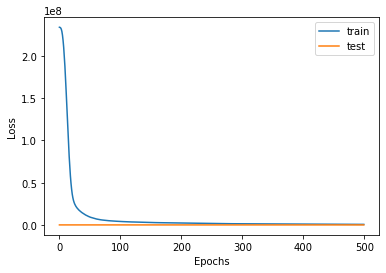

In [137]:
plt.plot(history_dict['loss'])
plt.plot(history_dict['mae'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [138]:
all_scores

[2033.49267578125,
 1867.81396484375,
 1704.0355224609375,
 2124.95361328125,
 2131.315673828125,
 2158.55078125,
 2188.5224609375,
 2185.59130859375,
 2397.42236328125]

In [139]:
np.mean(all_scores)

2087.9664849175347

In [140]:
val_mse, val_mae = model.evaluate(carfeatures_test, carprices_test )

2/2 [==============================] - 0s 916us/step - loss: 6536055.5000 - mae: 1751.1548


In [141]:
carprice_pred=model.predict(carfeatures_test)

print(carprices_test,carprice_pred)

[30760.    17859.167  9549.    11850.    28248.     7799.     7788.
  9258.    10198.     7775.    13295.     8238.    18280.     9988.
 40960.     6488.     5151.    12629.     8189.     9960.     8495.
 13499.     8249.     6479.     6692.    41315.     9639.    13415.
  7999.    12940.    25552.     6229.     7898.    21485.     7689.
 28176.    11259.    10945.     8916.5   14489.     7463.    18344.
 15580.     6918.     7499.     9095.     6229.     7053.    16900.
 12964.     6295.    16558.     7099.     8948.     7349.    15250.
  8449.    11845.    37028.     5389.     9233.    17199.   ] [[26835.742 ]
 [17744.508 ]
 [ 8142.2466]
 [11873.941 ]
 [26246.121 ]
 [ 5932.221 ]
 [ 9489.78  ]
 [ 7043.0703]
 [10165.02  ]
 [ 5872.9214]
 [15660.414 ]
 [ 6893.    ]
 [12404.    ]
 [10868.243 ]
 [43319.62  ]
 [ 6592.87  ]
 [ 9332.082 ]
 [13808.195 ]
 [ 7508.4854]
 [ 9591.006 ]
 [10242.575 ]
 [15462.846 ]
 [ 6418.064 ]
 [ 7992.871 ]
 [ 7101.106 ]
 [29067.316 ]
 [11042.902 ]
 [15766.581 ]
 [